# Pandas for Data Science
This notebook demonstrates powerful capabilities of the Pandas library using a complex dataset.


In [3]:
import pandas as pd
import numpy as np

# load employee data
employee_data = pd.read_csv('employee_data.csv')
# Display the first few rows of the dataset
employee_data.head()
df = employee_data.copy()

### GroupBy and Multi-Level Aggregation

In [5]:
# Average salary and performance by Department and Team
agg_df = df.groupby(['Department', 'Team']).agg({
    'Salary': ['mean', 'max', 'min'],
    'PerformanceScore': ['mean', 'std'],
    'Age': 'median'
})
agg_df

Salary                PerformanceScore            \
                               mean     max    min             mean       std   
Department       Team                                                           
Finance          A     69902.476190  115022  31337         2.871667  0.425268   
                 B     77782.512821  119344  34715         3.064103  0.380289   
                 C     71757.066667  115145  30102         3.013000  0.382209   
                 D     73366.250000  119763  32626         3.069167  0.489941   
                 E     73782.156250  117770  31452         3.116563  0.539693   
HR               A     72177.139535  118432  30013         2.926279  0.493578   
                 B     69841.146341  118302  31345         2.938537  0.593345   
                 C     78227.276596  116458  31288         3.030000  0.525568   
                 D     77782.512821  119558  31537         2.874872  0.543623   
                 E     81830.254902  119903  31107         3.073529  0.473362   
R&D Data Science A     79346.297297  118885  32889         3.052973  0.494233   
                 B     75588.666667  119698  30095         2.929167  0.574299   
                 C     77783.702703  116949  31684         2.921081  0.519170   
                 D     81916.340000  117247  31532         2.918800  0.498228   
                 E     74778.972973  117541  31548         2.911892  0.502609   
R&D Hardware     A     74350.531250  119381  30171         3.014063  0.610499   
                 B     74359.531915  119976  30344         3.034255  0.513719   
                 C     72746.108696  117754  32822         3.133043  0.445301   
                 D     72262.977273  115446  30656         2.999773  0.438647   
                 E     82352.304348  116335  35637         2.982174  0.487880   
Sales            A     77319.342105  115826  32205         3.000263  0.442740   
                 B     81986.090909  117520  35171         3.095758  0.559325   
                 C     79167.921053  119752  30104         2.930526  0.510574   
                 D     77508.954545  119733  30490         2.927273  0.483300   
                 E     74552.652174  115191  30211         2.850435  0.478093   

                         Age  
                      median  
Department       Team         
Finance          A      33.5  
                 B      38.0  
                 C      40.5  
                 D      39.0  
                 E      39.5  
HR               A      42.0  
                 B      40.0  
                 C      42.0  
                 D      46.0  
                 E      36.0  
R&D Data Science A      42.0  
                 B      38.0  
                 C      42.0  
                 D      39.5  
                 E      42.0  
R&D Hardware     A      42.5  
                 B      38.0  
                 C      40.5  
                 D      44.0  
                 E      43.0  
Sales            A      40.0  
                 B      39.0  
                 C      41.0  
                 D      41.0  
                 E      41.0

### Filtering with Complex Conditions

In [6]:
# Employees in Engineering, older than 40, with high performance
filtered = df[
    (df['Department'] == 'Engineering') & 
    (df['Age'] > 40) & 
    (df['PerformanceScore'] > 3.5)
]
filtered.sort_values(by='PerformanceScore', ascending=False)

,EmployeeID,Name,Department,Team,JoinDate,Age,Salary,PerformanceScore


### Using `apply()` with Custom Logic

In [8]:
# Ensure JoinDate is datetime
df['JoinDate'] = pd.to_datetime(df['JoinDate'])

def experience_level(row):
    years = 2025 - row['JoinDate'].year
    if years < 2:
        return 'Junior'
    elif years < 5:
        return 'Mid'
    else:
        return 'Senior'

df['ExperienceLevel'] = df.apply(experience_level, axis=1)
df[['Name', 'JoinDate', 'ExperienceLevel']].head()

,Name,JoinDate,ExperienceLevel
0,Emp_1,2019-03-22,Senior
1,Emp_2,2020-06-24,Senior
2,Emp_3,2020-01-29,Senior
3,Emp_4,2019-01-09,Senior
4,Emp_5,2019-05-26,Senior


### Creating Pivot Tables

In [9]:
pivot = pd.pivot_table(df, 
                         index='Department', 
                         columns='ExperienceLevel', 
                         values='Salary', 
                         aggfunc='mean')
pivot

ExperienceLevel,Mid,Senior
Department,,
Finance,72566.871287,74172.100000
HR,75052.272727,77431.504505
R&D Data Science,79589.696970,76716.948980
R&D Hardware,71347.408163,77681.531915
Sales,75960.250000,79608.631068


### Merging DataFrames

In [10]:
# Simulate a new DataFrame with bonus info
bonus_df = pd.DataFrame({
    'EmployeeID': np.random.choice(df['EmployeeID'], size=50, replace=False),
    'Bonus': np.random.randint(1000, 10000, size=50)
})

# Merge with main data
df_merged = df.merge(bonus_df, on='EmployeeID', how='left')
df_merged[['Name', 'Department', 'Bonus']].head()

,Name,Department,Bonus
0,Emp_1,Finance,NaN
1,Emp_2,Sales,NaN
2,Emp_3,HR,NaN
3,Emp_4,HR,NaN
4,Emp_5,HR,NaN


###  Time Series: Resampling and Rolling Averages

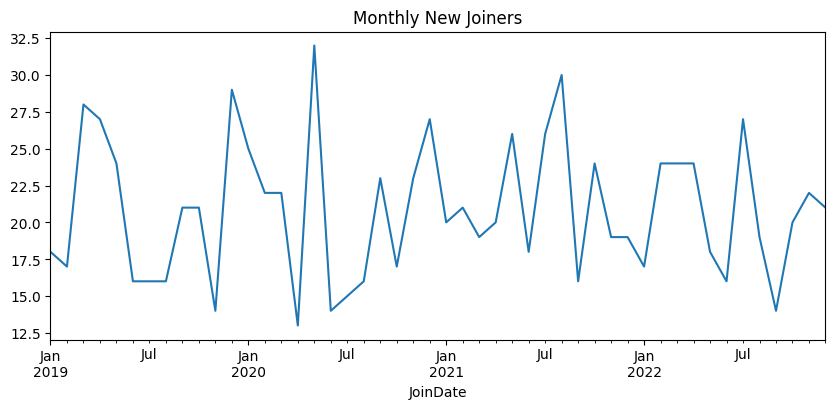

In [11]:
# Monthly new joiners
monthly_joins = df.set_index('JoinDate').resample('M')['EmployeeID'].count()
monthly_joins.plot(title='Monthly New Joiners', figsize=(10,4));

## Exercice: Sales Data Analysis

You are provided with a dataset `sales_data.csv` containing retail transactions with the following columns:

- `OrderID`: Order identifier  
- `CustomerID`: Unique customer identifier  
- `Product`: Product name  
- `Category`: Product category  
- `Quantity`: Number of units sold  
- `Price`: Unit price  
- `OrderDate`: Date of the order  
- `Country`: Customer's country  

### Tasks:

1. **Basic Exploration**:
   - Display the first 5 rows.
   - Count missing values in each column.
   - Print summary statistics for `Quantity` and `Price`.

2. **Data Cleaning**:
   - Remove rows where `Quantity` or `Price` is less than or equal to 0.
   - Convert `OrderDate` to datetime format.

3. **Feature Engineering**:
   - Create a new column `TotalAmount` = `Quantity` × `Price`.
   - Extract the `Month` and `DayOfWeek` from `OrderDate`.

4. **Analysis**:
   - What is the total revenue per `Country`? (Sort descending)
   - What are the top 5 best-selling products by `Quantity`?
   - How many unique customers are there in each `Country`?

5. **Time Series Aggregation**:
   - Plot total daily revenue (`OrderDate` vs. `TotalAmount`) using a line plot.
   - Compute the monthly average quantity sold per category.

> 💡 Use `.groupby()`, `.agg()`, `.pivot_table()`, and visualization functions where appropriate.

In [4]:
# load sales data
sales_data = pd.read_csv('sales_data.csv')
df2 = sales_data.copy()

### Basic exploration

In [5]:
# Display the first 5 rows
df2.head(5)

,OrderID,CustomerID,Product,Category,Quantity,Price,OrderDate,Country
0,25795,1921,Tablet,Electronics,2,62.49,2023-04-29,UK
1,10860,1969,Tablet,Accessories,1,696.56,2023-05-01,Germany
2,86820,1601,Headphones,Electronics,2,983.76,2023-01-19,France
3,64886,1417,Charger,Electronics,1,242.98,2023-06-24,Germany
4,16265,1114,Laptop,Electronics,1,146.54,2023-05-22,Germany


In [6]:
# Count missing values in each column
df2.isnull().sum()

OrderID       0
CustomerID    0
Product       0
Category      0
Quantity      0
Price         0
OrderDate     0
Country       0
dtype: int64

In [7]:
# Print summary statistics for Quantity and Price
df2[['Quantity', 'Price']].describe()

,Quantity,Price
count,500.000000,500.00000
mean,4.896000,507.91238
std,2.567171,287.00474
min,1.000000,8.20000
25%,3.000000,257.79500
50%,5.000000,517.38500
75%,7.000000,760.82250
max,9.000000,998.36000


### Data Cleaning

In [8]:
# Remove rows where Quantity or Price is less than or equal to zero
df2 = df2[(df2['Quantity'] > 0) & (df2['Price'] > 0)]

In [9]:
# Convert OrderDate to datetime
df2['OrderDate'] = pd.to_datetime(df2['OrderDate'])

### Feature Engineering

In [10]:
# Create a new column TotalAmount = Quantity * Price
df2['TotalAmount'] = df2['Quantity'] * df2['Price']

In [11]:
# Extract the month and DayOfWeek from OrderDate
df2['OrderMonth'] = df2['OrderDate'].dt.month
df2['OrderDayOfWeek'] = df2['OrderDate'].dt.day_name()

### Analysis

In [12]:
# What is the total revenue per country ? (sort descending)
total_revenue = df2.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)
total_revenue

Country
Spain      279412.27
USA        255293.26
UK         240956.09
Germany    237998.58
France     229219.37
Name: TotalAmount, dtype: float64

In [14]:
# What are the top 5 best-selling products by total quantity ?
top_products = df2.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
top_products

Product
Phone         552
Charger       502
Tablet        485
Laptop        470
Headphones    439
Name: Quantity, dtype: int64

In [15]:
# How many customers are there in each country ?
customers_per_country = df2.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)
customers_per_country

Country
USA        104
Spain       99
France      97
Germany     95
UK          89
Name: CustomerID, dtype: int64

### Time series aggregation

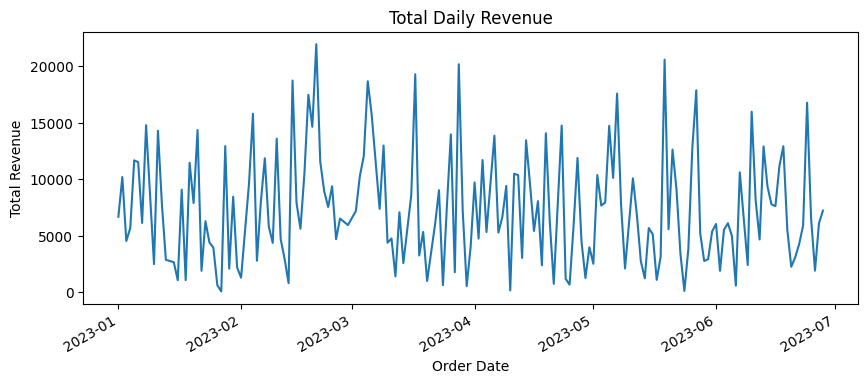

In [16]:
# Plot total daily revenue (OrderDate vs TotalAmount) using a line plot
import matplotlib.pyplot as plt
daily_revenue = df2.groupby('OrderDate')['TotalAmount'].sum()
daily_revenue.plot(title='Total Daily Revenue', figsize=(10, 4))
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.show()

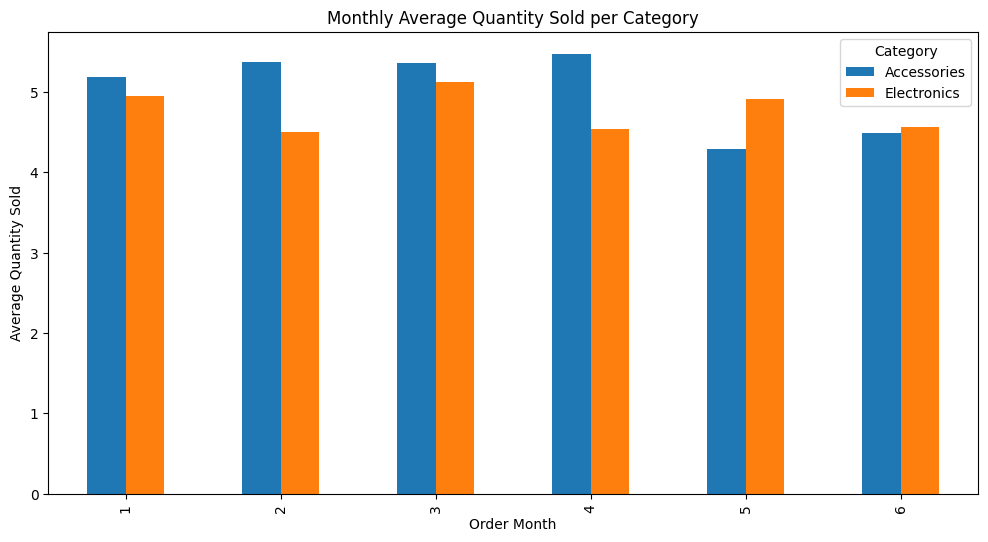

In [18]:
# Compute the monthly average quantity sold per category
average_quantity_per_category = df2.groupby(['OrderMonth', 'Category'])['Quantity'].mean().unstack()
average_quantity_per_category.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Average Quantity Sold per Category')
plt.xlabel('Order Month')
plt.ylabel('Average Quantity Sold')
plt.show()